(0.0, 1.5)

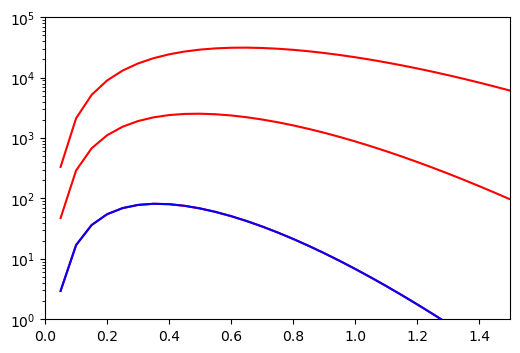

In [32]:
import numpy as np
import matplotlib.pyplot as plt

data=np.loadtxt('../output/oguri1/Nlzob0_1.dat')
log10m=data[0,1:]
z=data[1:,0]
Nmz=data[1:-1,1:-1]
Nz=Nmz.sum(axis=1)
data=np.loadtxt('../output/oguri1/Nlzob0_2.dat')
Nz2=data[1:-1,1:-1].sum(axis=1)
data=np.loadtxt('../output/oguri1/Nlzob0_3.dat')
Nz3=data[1:-1,1:-1].sum(axis=1)
data=np.loadtxt('../output/oguri1/Nlzob0.dat')
Nz4=data[1:-1,1:-1].sum(axis=1)
z4=data[1:,0]

dNdz=np.zeros(len(Nz))
for i in range(len(Nz)-1):
    dNdz[i]=(Nz[i+1]-Nz[i])/(z[i+1]-z[i])

plt.figure(0,figsize=(6,4),dpi=100)
plt.semilogy(z[1:],Nz/0.05,'r')
plt.semilogy(z[1:],Nz2/0.05,'r')
plt.semilogy(z[1:],Nz3/0.05,'r')
plt.semilogy(z4[1:],Nz4/0.05,'b')
plt.ylim(1,1e5)
plt.xlim(0.,1.5)

(1e-05, 0.1)

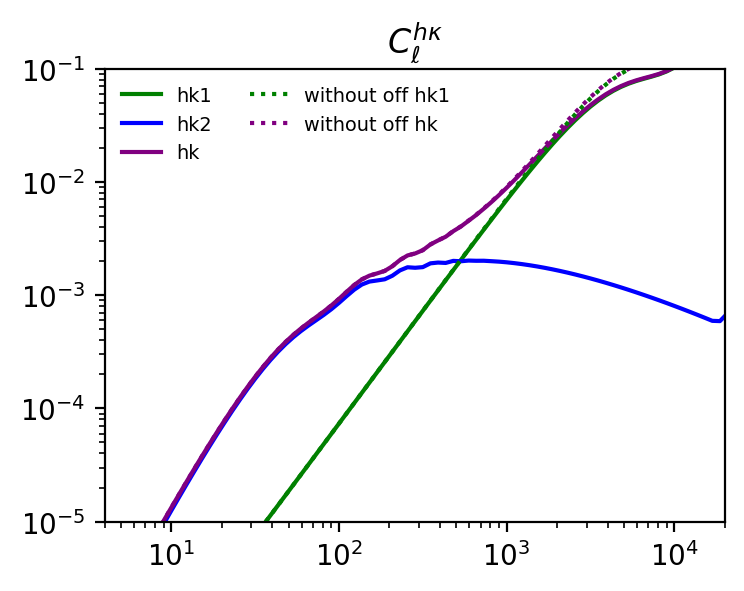

In [16]:
import numpy as np
import matplotlib.pyplot as plt

data=np.loadtxt('../output/oguri1/right_hk1.dat')
z=data[0,1:]
l=data[1:,0]
Clz1=data[1:,1]
data=np.loadtxt('../output/oguri1/right_hk2.dat')
Clz2=data[1:,1]
data=np.loadtxt('../output/oguri1/without_off_hk1.dat')
Clz11=data[1:,1]



CCC1=np.zeros(len(l))
CCC2=np.zeros(len(l))
CCC=np.zeros(len(l))
CCC11=np.zeros(len(l))
CCC11t=np.zeros(len(l))
for i in range(len(l)):
    CCC1[i]=Clz1[i]*l[i]*(l[i]+1)/(2.*np.pi)
    CCC2[i]=Clz2[i]*l[i]*(l[i]+1)/(2.*np.pi)
    CCC[i]=(Clz1[i]+Clz2[i])*l[i]*(l[i]+1)/(2.*np.pi)
    CCC11[i]=Clz11[i]*l[i]*(l[i]+1)/(2.*np.pi)
    CCC11t[i]=(Clz11[i]+Clz2[i])*l[i]*(l[i]+1)/(2.*np.pi)
# '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'
plt.figure(0,figsize=(4,3),dpi=200)
plt.loglog(l,CCC1,'green',label='hk1')
plt.loglog(l,CCC2,'blue',label='hk2')
plt.loglog(l,CCC,'purple',label='hk')
plt.loglog(l,CCC11,'green',linestyle=':',label='without off hk1')
plt.loglog(l,CCC11t,'purple',linestyle=':',label='without off hk')
plt.title("$C_{\ell}^{h\kappa}$")
#plt.legend()
plt.legend(loc='upper left',ncol=2, frameon=False, fontsize="x-small")

plt.xlim(4,2.0e4)
plt.ylim(1.0e-5,0.1)
#plt.xlim(1e3,1.0e4)
#plt.ylim(1.0e-2,0.1)

# dN/dz

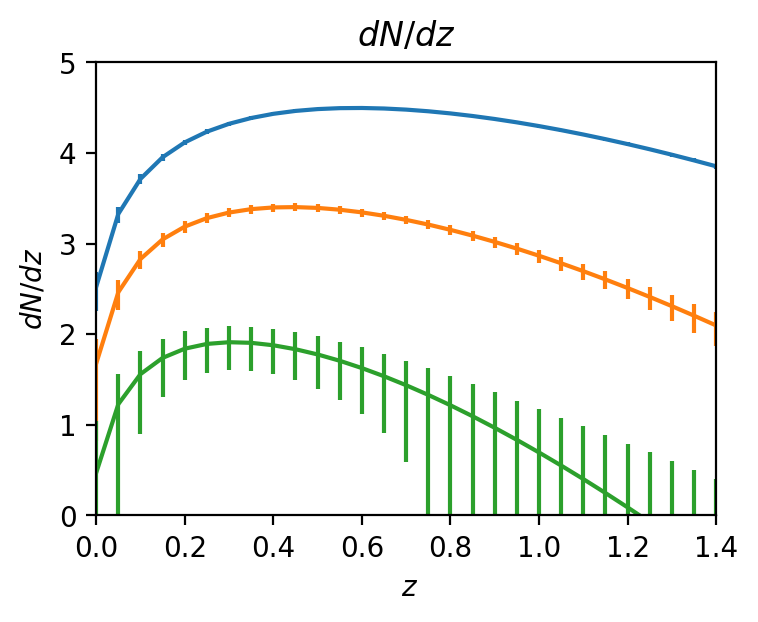

In [29]:
#导入函数库
import matplotlib.pylab as plt
import numpy as np

data=np.loadtxt('../output/oguri1/Nlzob0_1.dat')
z=data[1:-1,0]
N1=data[1:-1,1]
data=np.loadtxt('../output/oguri1/Nlzob0_2.dat')
N2=data[1:-1,1]
data=np.loadtxt('../output/oguri1/Nlzob0_3.dat')
N3=data[1:-1,1]

data=np.loadtxt('../output/oguri1/Cov0_NN_1.dat')
sigma1=np.sqrt(data[:-1,1])
data=np.loadtxt('../output/oguri1/Cov0_NN_2.dat')
sigma2=np.sqrt(data[:-1,1])
data=np.loadtxt('../output/oguri1/Cov0_NN_3.dat')
sigma3=np.sqrt(data[:-1,1])

log10N1=np.log10(N1/0.05)
log10Nmax1=np.log10((N1+sigma1)/0.05)
log10Nmin1=np.log10(np.maximum(N1-sigma1,1.0e-10)/0.05)
log10N2=np.log10(N2/0.05)
log10Nmax2=np.log10((N2+sigma2)/0.05)
log10Nmin2=np.log10(np.maximum(N2-sigma2,1.0e-10)/0.05)
log10N3=np.log10(N3/0.05)
log10Nmax3=np.log10((N3+sigma3)/0.05)
log10Nmin3=np.log10(np.maximum(N3-sigma3,1.0e-10)/0.05)

#设置errorbar的大小
yerr1 = np.zeros([2,len(z)])
yerr2 = np.zeros([2,len(z)])
yerr3 = np.zeros([2,len(z)])
yerr1[0,:] = log10N1-log10Nmin1
yerr1[1,:] = log10Nmax1-log10N1
yerr2[0,:] = log10N2-log10Nmin2
yerr2[1,:] = log10Nmax2-log10N2
yerr3[0,:] = log10N3-log10Nmin3
yerr3[1,:] = log10Nmax3-log10N3

#绘制误差棒图
plt.figure(0,figsize=(4,3),dpi=200)
#绘制errorbar
#plt.errorbar(log10l,Clzhh,yerr=yerr[:,:],ecolor='k',elinewidth=0.5,marker='s',mfc='orange',\
#	mec='k',mew=1,ms=10,alpha=1,capsize=5,capthick=3,linestyle="none",label="Observation")
plt.errorbar(z,log10N1,yerr=yerr1[:,:])
plt.errorbar(z,log10N2,yerr=yerr2[:,:])
plt.errorbar(z,log10N3,yerr=yerr3[:,:])

# 设置坐标轴及图例显示信息
plt.xlabel(r" $z$")
plt.ylabel(r"$dN/dz$")
plt.title(r"$dN/dz$")
# 将图片保存在当前目录
#fig = plt.gcf()
#fig.set_size_inches(8, 10)
#fig.savefig('Obs-syn-amp-mean.png', dpi=500)

plt.xlim(0.,1.4)
plt.ylim(0,5)
plt.show()





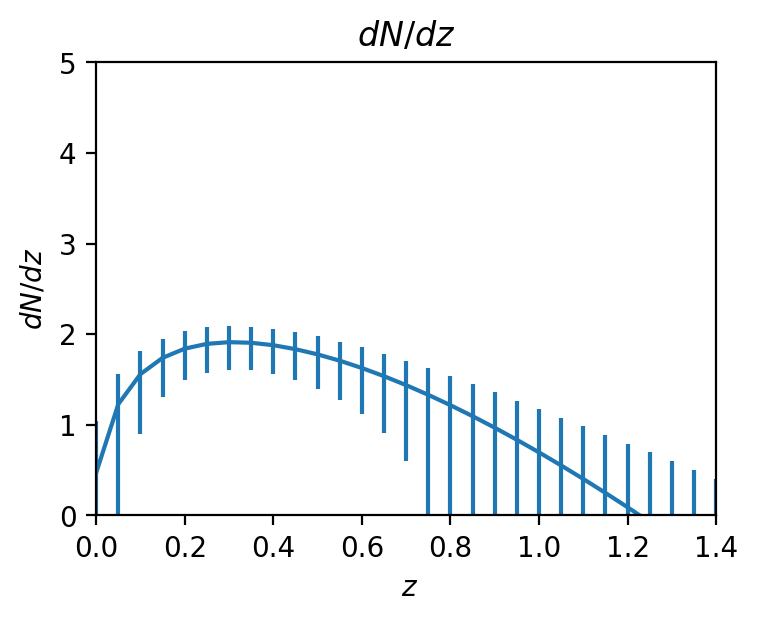

In [2]:
#导入函数库
import matplotlib.pylab as plt
import numpy as np

data=np.loadtxt('../output/oguri1/Nlzob0.dat')
z=data[1:-1,0]
N1=data[1:-1,1]


data=np.loadtxt('../output/oguri1/Cov0_NN.dat')
sigma1=np.sqrt(data[:-1,1])


log10N1=np.log10(N1/0.05)
log10Nmax1=np.log10((N1+sigma1)/0.05)
log10Nmin1=np.log10(np.maximum(N1-sigma1,1.0e-10)/0.05)


#设置errorbar的大小
yerr1 = np.zeros([2,len(z)])

yerr1[0,:] = log10N1-log10Nmin1
yerr1[1,:] = log10Nmax1-log10N1


#绘制误差棒图
plt.figure(0,figsize=(4,3),dpi=200)
#绘制errorbar
#plt.errorbar(log10l,Clzhh,yerr=yerr[:,:],ecolor='k',elinewidth=0.5,marker='s',mfc='orange',\
#	mec='k',mew=1,ms=10,alpha=1,capsize=5,capthick=3,linestyle="none",label="Observation")
plt.errorbar(z,log10N1,yerr=yerr1[:,:])


# 设置坐标轴及图例显示信息
plt.xlabel(r" $z$")
plt.ylabel(r"$dN/dz$")
plt.title(r"$dN/dz$")
# 将图片保存在当前目录
#fig = plt.gcf()
#fig.set_size_inches(8, 10)
#fig.savefig('Obs-syn-amp-mean.png', dpi=500)

plt.xlim(0.,1.4)
plt.ylim(0,5)
plt.show()





# Chh

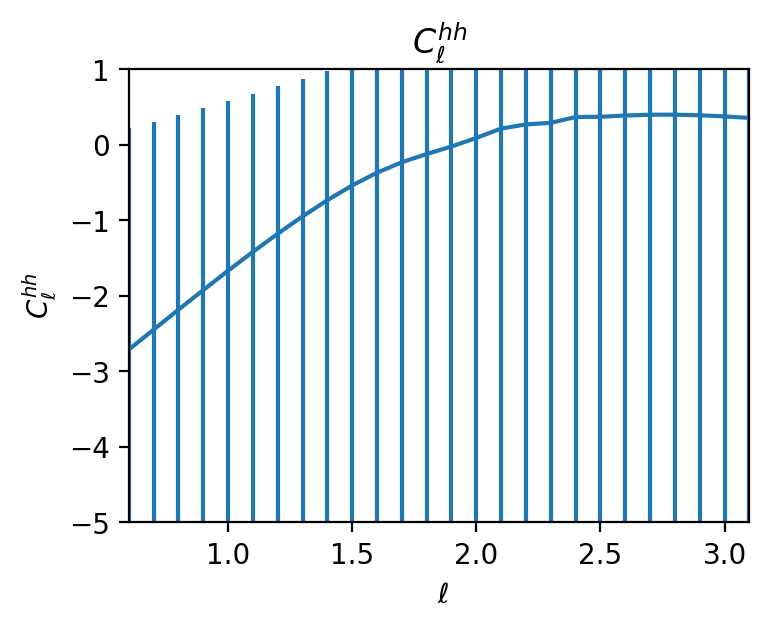

In [1]:
#导入函数库
import matplotlib.pylab as plt
import numpy as np

data=np.loadtxt('../output/oguri1/Clz0_hh.dat')
Clzhh=data[1:,1]
l=data[1:,0]
log10l=np.log10(l)

data=np.loadtxt('../output/oguri1/Cov0_hhhh.dat')
Covhhhh=data[1:,1]
sigma=np.sqrt(Covhhhh)

max=Clzhh+sigma
min=Clzhh-sigma



log10Cmax=np.zeros(len(l))
log10Cmin=np.zeros(len(l))
log10C=np.zeros(len(l))
for i in range(len(l)):
    if(min[i]<=0):
        min[i]=Clzhh[i]*0.000001
    log10C[i]=np.log10(Clzhh[i]*l[i]*(l[i]+1)/(2.*np.pi))
    log10Cmax[i]=np.log10(max[i]*l[i]*(l[i]+1)/(2.*np.pi))
    log10Cmin[i]=np.log10(min[i]*l[i]*(l[i]+1)/(2.*np.pi))
#设置errorbar的大小
yerr = np.zeros([2,len(l)])
yerr[0,:] = log10C-log10Cmin
yerr[1,:] = log10Cmax-log10C

#绘制误差棒图
plt.figure(0,figsize=(4,3),dpi=200)
#绘制errorbar
#plt.errorbar(log10l,Clzhh,yerr=yerr[:,:],ecolor='k',elinewidth=0.5,marker='s',mfc='orange',\
#	mec='k',mew=1,ms=10,alpha=1,capsize=5,capthick=3,linestyle="none",label="Observation")
plt.errorbar(log10l,log10C,yerr=yerr[:,:])
#plt.plot(log10l,log10C,'r')
#plt.plot(log10l,log10C,'r')
# 设置坐标轴及图例显示信息
plt.xlabel(r" $\ell$")
plt.ylabel(r"$C_{\ell}^{hh}$")
plt.title(r"$C_{\ell}^{hh}$")


plt.xlim(np.log10(4),3.1)
plt.ylim(-5,1)
plt.show()






# Chk

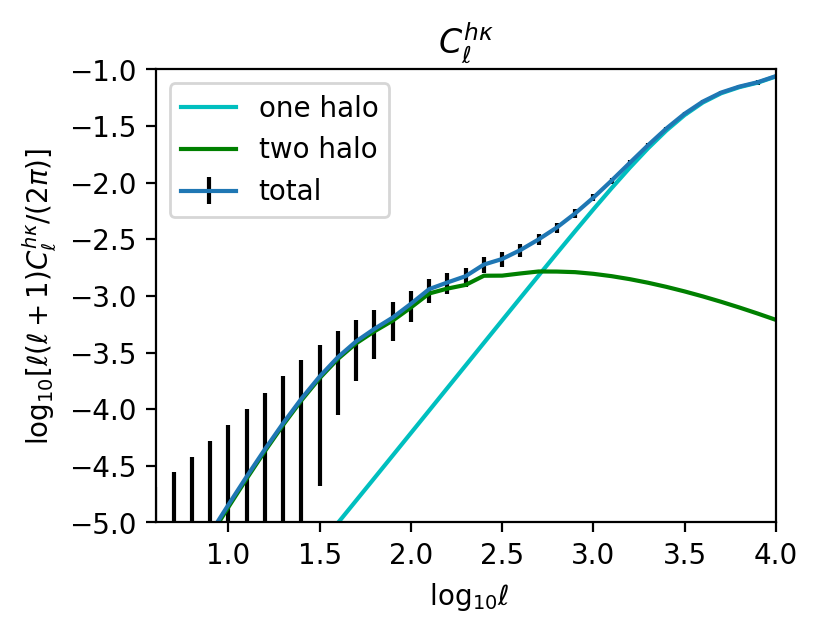

In [19]:
#导入函数库
import matplotlib.pylab as plt
import numpy as np

data=np.loadtxt('../output/oguri1/Clz0_hk.dat')
Clzhk=data[1:,1]
l=data[1:,0]
log10l=np.log10(l)

data=np.loadtxt('../output/oguri1/Cov0_hkhk.dat')
Cov=data[:,1]
sigma=np.sqrt(Cov)

max=Clzhk+sigma
min=Clzhk-sigma
data=np.loadtxt('../output/oguri1/Clz0_hk1.dat')
Clzhk1=data[1:,1]
data=np.loadtxt('../output/oguri1/Clz0_hk2.dat')
Clzhk2=data[1:,1]


log10Cmax=np.zeros(len(l))
log10Cmin=np.zeros(len(l))
log10C=np.zeros(len(l))
log10C1=np.zeros(len(l))
log10C2=np.zeros(len(l))
for i in range(len(l)):
    if(min[i]<=0):
        min[i]=Clzhk[i]*0.000001
    log10C[i]=np.log10(Clzhk[i]*l[i]*(l[i]+1)/(2.*np.pi))
    log10C1[i]=np.log10(Clzhk1[i]*l[i]*(l[i]+1)/(2.*np.pi))
    log10C2[i]=np.log10(Clzhk2[i]*l[i]*(l[i]+1)/(2.*np.pi))
    log10Cmax[i]=np.log10(max[i]*l[i]*(l[i]+1)/(2.*np.pi))
    log10Cmin[i]=np.log10(min[i]*l[i]*(l[i]+1)/(2.*np.pi))
#设置errorbar的大小
yerr = np.zeros([2,len(l)])
yerr[0,:] = log10C-log10Cmin
yerr[1,:] = log10Cmax-log10C

#绘制误差棒图
plt.figure(0,figsize=(4,3),dpi=200)
#绘制errorbar
#plt.errorbar(log10l,Clzhh,yerr=yerr[:,:],ecolor='k',elinewidth=0.5,marker='s',mfc='orange',\
#	mec='k',mew=1,ms=10,alpha=1,capsize=5,capthick=3,linestyle="none",label="Observation")
plt.errorbar(log10l,log10C,yerr=yerr[:,:],ecolor='k',label="total")
plt.plot(log10l,log10C1,'c',label="one halo")
plt.plot(log10l,log10C2,'g',label="two halo")
# 设置坐标轴及图例显示信息
plt.xlabel(r" $\log_{10}\ell$")
plt.ylabel(r"$\log_{10}[\ell (\ell+1)C_{\ell}^{h\kappa}/(2\pi)]$")
plt.title(r"$C_{\ell}^{h\kappa}$")
plt.legend()
# 将图片保存在当前目录
#fig = plt.gcf()
#fig.set_size_inches(8, 10)
#fig.savefig('Obs-syn-amp-mean.png', dpi=500)


plt.xlim(np.log10(4),4.)
plt.ylim(-5,-1)
plt.show()






# CMB fisher

1. 首先计算9个参数的cov matrix C1
2. 去掉C1中的ODE,w0 wa,tau_reio，得到C2
3. C2 转置得到F2
4. 其他fisher矩阵，加入CMB先验时，即加入F2

相当于已知5个参数的先验sigma，sigma^2放在对角线上，组成对角矩阵CC2。
CC2转置得到FF2，也是对角矩阵。
但这样算对角矩阵，没有非对角元，不能打破简并。

In [64]:
import numpy as np 
import matplotlib.pyplot as plt
from __future__ import print_function
Np=9


data=np.loadtxt('../output/oguri_cmb/matrix.dat')
F=data[0:Np,0:Np]
print('{:e}'.format(np.linalg.cond(F)))

C=np.matrix(F).I
for i in range(Np):
    print('{:.4f}'.format(np.sqrt(C[i,i])),end=' ')

dele=[0,1,2,8]
C2=np.delete(C,dele,axis=0)
F2=np.matrix(C2).I



# ODE, w0, wa,   ln Omh2,  ln Obh2,  n_s,   alpha_s,  ln delta_zeta  , tau_reio
#                0.0102,  0.0086,   0.0226, 0.0068,   0.0174


1.556227e+08
0.1664 0.8463 1.5232 0.0100 0.0082 0.0219 0.0067 0.0200 0.0120 

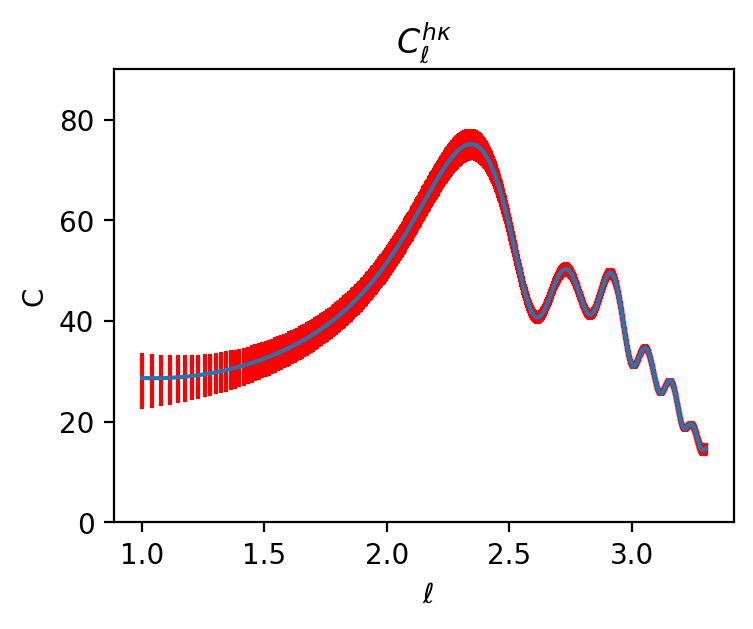

In [2]:
#导入函数库
import matplotlib.pylab as plt
import numpy as np

data=np.loadtxt('../output/oguri_cmb/C0_cmb.dat')
l=data[:,0]
CTT=data[:,1]
CEE=data[:,2]
CTE=data[:,3]
log10l=np.log10(l)

data=np.loadtxt('../output/oguri_cmb/Cov0_cmb.dat')
sigmaTT=np.sqrt(data[:,1])
sigmaEE=np.sqrt(data[:,2])
sigmaTE=np.sqrt(data[:,3])

maxTT=CTT+sigmaTT
minTT=CTT-sigmaTT


sqrt_max_TT=np.zeros(len(l))
sqrt_min_TT=np.zeros(len(l))
sqrt_TT=np.zeros(len(l))
for i in range(len(l)):
    if(minTT[i]*l[i]*(l[i]+1)<=0):
        minTT[i]=1.0e-20/(l[i]*(l[i]+1))
    #if(maxTT[i]>=CTT[i]*2.):
    #    maxTT[i]=CTT[i]*2.
    sqrt_TT[i]=np.sqrt(CTT[i]*l[i]*(l[i]+1)/(2.*np.pi))
    sqrt_max_TT[i]=np.sqrt(maxTT[i]*l[i]*(l[i]+1)/(2.*np.pi))
    sqrt_min_TT[i]=np.sqrt(minTT[i]*l[i]*(l[i]+1)/(2.*np.pi))
#设置errorbar的大小
yerr = np.zeros([2,len(l)])
yerr[0,:] = sqrt_TT-sqrt_min_TT
yerr[1,:] = sqrt_max_TT-sqrt_TT

#绘制误差棒图
plt.figure(0,figsize=(4,3),dpi=200)
#绘制errorbar
#plt.errorbar(log10l,Clzhh,yerr=yerr[:,:],ecolor='k',elinewidth=0.5,marker='s',mfc='orange',\
#	mec='k',mew=1,ms=10,alpha=1,capsize=5,capthick=3,linestyle="none",label="Observation")
plt.errorbar(log10l,sqrt_TT,yerr=yerr[:,:],ecolor='red')

# 设置坐标轴及图例显示信息
plt.xlabel(r" $\ell$")
plt.ylabel(r"C")
plt.title(r"$C_{\ell}^{h\kappa}$")
# 将图片保存在当前目录
#fig = plt.gcf()
#fig.set_size_inches(8, 10)
#fig.savefig('Obs-syn-amp-mean.png', dpi=500)

#plt.xlim(np.log10(4),4.)
plt.ylim(0.,90.)
plt.show()





In [38]:
#导入函数库
import matplotlib.pylab as plt
import numpy as np
Np=9
Nid=2*Np+1
Nell=1991

skiprows=14
data=np.loadtxt('../data/oguri_cmb/p0_cl.dat',skiprows=skiprows)
ell=data[:Nell,0]
CTT=np.zeros((Nid,Nell))
CTT_hat=np.zeros((Nid,Nell))
CEE=np.zeros((Nid,Nell))
CEE_hat=np.zeros((Nid,Nell))
CTE=np.zeros((Nid,Nell))
CovTTTT=np.zeros((Nid,Nell))
CovEEEE=np.zeros((Nid,Nell))
CovTETE=np.zeros((Nid,Nell))

for i in range(Nid):
    data=np.loadtxt('../data/oguri_cmb/p'+str(i)+'_cl.dat',skiprows=skiprows)
    CTT[i]=data[:Nell,1]
    CEE[i]=data[:Nell,2]
    CTE[i]=data[:Nell,4]

Tcmb=2.725
#planck
fsky=0.7
theta=np.array([8.0,5.5]) /(60.*180.)*np.pi
sigmaT=np.array([5.2,11.7])
sigmaP=np.array([10.8,24.3])
#planck+wmap
#fsky=0.7
#theta=np.array([8.0,5.5,28.2,21.0,12.6]) /(60.*180.)*np.pi
#sigmaT=np.array([5.2,11.7,17.2,30.0,49.9])
#sigmaP=np.array([10.8,24.3,24.4,42.6,70.7])
#fsky=0.65
#theta=np.array([7.0]) /(60.*180.)*np.pi
#sigmaT=np.array([23./7.])
#sigmaP=np.array([42./7.])

wT = 1./(theta*sigmaT)**2.
wP = 1./(theta*sigmaP)**2.

for i in range(Nid):
    for l in range(Nell):
        #CTT[i][l] = CTT[i][l]*2.*np.pi/(ell[l]*(ell[l]+1.)) *(Tcmb*1.0e6)**2
        CTT[i][l] = CTT[i][l]*2.*np.pi/(ell[l]*(ell[l]+1.))
        CEE[i][l] = CEE[i][l]*2.*np.pi/(ell[l]*(ell[l]+1.))
        CTE[i][l] = CTE[i][l]*2.*np.pi/(ell[l]*(ell[l]+1.))
        B2 = np.exp(  -ell[l]*(ell[l]+1.) * theta**2. /8./np.log(2.)  )
        #noiseT = (1./wT/B2).sum()
        #noiseP = (1./wP/B2).sum()
        noiseT = 1./(wT*B2).sum()
        noiseP = 1./(wP*B2).sum()
        CTT_hat[i][l] = CTT[i][l] + noiseT
        CEE_hat[i][l] = CEE[i][l] + noiseP
        CovTTTT[i][l] = CTT_hat[i][l]**2.   *2./(2.*ell[l]+1.)/fsky
        CovEEEE[i][l] = CEE_hat[i][l]**2.   *2./(2.*ell[l]+1.)/fsky
        #CovTETE[i][l] = (CTE[i][l]**2.+CTT_hat[i][l]*CEE_hat[i][l])   *2./(2.*ell[l]+1.)/fsky
        CovTETE[i][l] = (CTE[i][l]**2.+CTT_hat[i][l]*CEE_hat[i][l])   *1./(2.*ell[l]+1.)/fsky


In [39]:
# ODE, w0, wa,   ln Omh2,  ln Obh2,  n_s,   alpha_s,  ln delta_zeta  , tau_reio
param=np.array([0.734,-1.,0.,np.log(0.134),np.log(0.0226),0.963,0.,np.log(4.89e-5),0.089])
param=param*1.0e-3*2.
param[2]=1.0e-3*2.
param[6]=1.0e-3*2.
fisher=np.zeros((Np,Np))
fisherEETE=np.zeros((Np,Np))
partialTT=np.zeros((Np,Nell))
partialEE=np.zeros((Np,Nell))
partialTE=np.zeros((Np,Nell))
for p in range(Np):
    for l in range(Nell):
        id2=2*p+2
        id1=2*p+1
        partialTT[p][l] = (CTT[id2][l]-CTT[id1][l])/param[p]
        partialEE[p][l] = (CEE[id2][l]-CEE[id1][l])/param[p]
        partialTE[p][l] = (CTE[id2][l]-CTE[id1][l])/param[p]
for p1 in range(Np):
    for p2 in range(Np):
        sum=0.
        for l in range(Nell):
            mat_cl = np.zeros((2,2))
            matder1 = np.zeros((2,2))
            matder2 = np.zeros((2,2))
            mat_cl[0,0] = CTT_hat[0][l]
            mat_cl[0,1] = CTE[0][l]
            mat_cl[1,0] = CTE[0][l]
            mat_cl[1,1] = CEE_hat[0][l]
            
            matder1[0,0] = partialTT[p1][l]
            matder1[0,1] = partialTE[p1][l]
            matder1[1,0] = partialTE[p1][l]
            matder1[1,1] = partialEE[p1][l]
            
            matder2[0,0] = partialTT[p2][l]
            matder2[0,1] = partialTE[p2][l]
            matder2[1,0] = partialTE[p2][l]
            matder2[1,1] = partialEE[p2][l]
            inv_cl = np.linalg.inv(mat_cl)#取逆
            #np.dot矩阵乘法
            sum += (2*ell[l]+1)*fsky/2 * np.trace(np.dot(np.dot(inv_cl,matder1),np.dot(inv_cl,matder2)))
        fisher[p1][p2] = sum
covariance=np.matrix(fisher).I
for i in range(Np):
    print('{:.4f}'.format(np.sqrt(covariance[i,i])),end=' ')


0.1968 1.0139 1.8675 0.0143 0.0124 0.0278 0.0082 0.0323 0.0029 

                     0.0102 0.0086 0.0226 0.0068 0.0174

0.1968 1.0139 1.8675 0.0143 0.0124 0.0278 0.0082 0.0323 0.0029  EH99的planck配置，noiseT = (1./wT/B2).sum()
0.1603 0.8155 1.4678 0.0096 0.0079 0.0211 0.0064 0.0192 0.0010  EH99的planck配置，noiseT = 1./(wT*B2).sum()
0.1602 0.8150 1.4672 0.0096 0.0079 0.0211 0.0064 0.0191 0.0010  EH99的planck+wmap配置，noiseT = 1./(wT*B2).sum()

0.2146 1.0772 1.8892 0.0150 0.0131 0.0341 0.0099 0.0561 0.0060 EH99的planck配置，noiseT = (1./wT/B2).sum()
0.1729 0.8644 1.4921 0.0098 0.0081 0.0231 0.0069 0.0264 0.0021 EH99的planck配置，noiseT = 1./(wT*B2).sum()


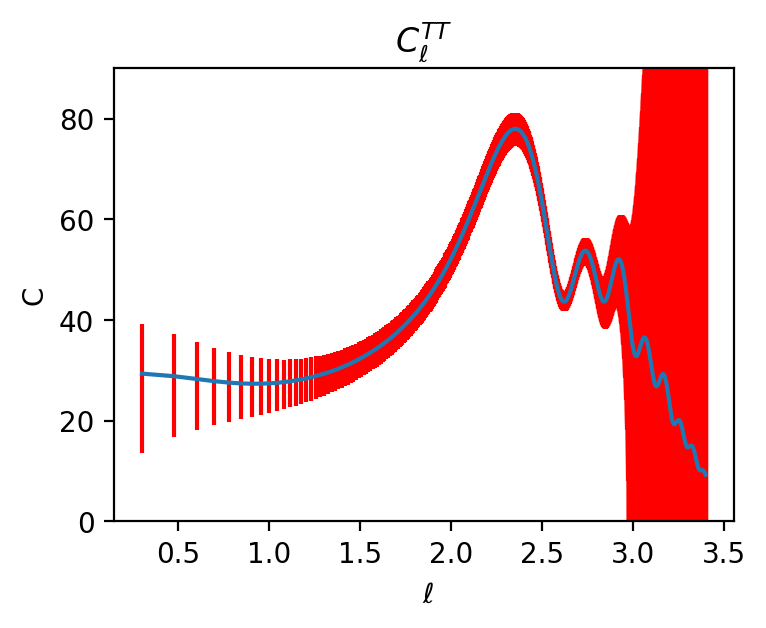

In [46]:
#导入函数库
import matplotlib.pylab as plt
import numpy as np

data=np.loadtxt('../src/check_cl.dat',skiprows=6)
ell=data[:,0]
CTT=data[:,1]
CEE=data[:,2]
CTE=data[:,4]

Nell=len(ell)
CTT_hat=np.zeros(Nell)
CEE_hat=np.zeros(Nell)
CovTTTT=np.zeros(Nell)
CovEEEE=np.zeros(Nell)
CovTETE=np.zeros(Nell)



Tcmb=2.725
fsky=0.65
#PLANCKerror
#theta=np.array([8.0,5.5]) /(60.*180.)*np.pi
#sigmaT=np.array([5.2,11.7])
#sigmaP=np.array([10.8,24.3])
#WMAP error
theta=np.array([28.2,21.0,12.6]) /(60.*180.)*np.pi
sigmaT=np.array([17.2,30.0,49.9])
sigmaP=np.array([24.4,42.6,70.7])
wT = 1./(theta*sigmaT)**2.
wP = 1./(theta*sigmaP)**2.

for l in range(Nell):
    #CTT[l] = CTT[l]*2.*np.pi/(ell[l]*(ell[l]+1.)) *(Tcmb*1.0e6)**2
    CTT[l] = CTT[l]*2.*np.pi/(ell[l]*(ell[l]+1.))
    CEE[l] = CEE[l]*2.*np.pi/(ell[l]*(ell[l]+1.))
    CTE[l] = CTE[l]*2.*np.pi/(ell[l]*(ell[l]+1.))
    B2 = np.exp(  -ell[l]*(ell[l]+1.) * theta**2. /8./np.log(2.)  )
    noiseT = 1./(wT*B2).sum()
    noiseT = 1./(wT*B2).sum()
    CTT_hat[l] = CTT[l] + noiseT
    CEE_hat[l] = CEE[l] + noiseP
    CovTTTT[l] = CTT_hat[l]**2.   *2./(2.*ell[l]+1.)/fsky
    CovEEEE[l] = CEE_hat[l]**2.   *2./(2.*ell[l]+1.)/fsky
    #CovTETE[l] = (CTE[l]**2.+CTT_hat[l]*CEE_hat[l])   *2./(2.*ell[l]+1.)/fsky
    CovTETE[l] = (CTE[l]**2.+CTT_hat[l]*CEE_hat[l])   *1./(2.*ell[l]+1.)/fsky

l=ell
log10l=np.log10(l)
sigmaTT=np.sqrt(CovTTTT)
maxTT=CTT+sigmaTT
minTT=CTT-sigmaTT

sqrt_max_TT=np.zeros(len(l))
sqrt_min_TT=np.zeros(len(l))
sqrt_TT=np.zeros(len(l))
for i in range(len(l)):
    if(minTT[i]*l[i]*(l[i]+1)<=0):
        minTT[i]=1.0e-20/(l[i]*(l[i]+1))
    sqrt_TT[i]=np.sqrt(CTT[i]*l[i]*(l[i]+1)/(2.*np.pi))
    sqrt_max_TT[i]=np.sqrt(maxTT[i]*l[i]*(l[i]+1)/(2.*np.pi))
    sqrt_min_TT[i]=np.sqrt(minTT[i]*l[i]*(l[i]+1)/(2.*np.pi))
#设置errorbar的大小
yerr = np.zeros([2,len(l)])
yerr[0,:] = sqrt_TT-sqrt_min_TT
yerr[1,:] = sqrt_max_TT-sqrt_TT

#绘制误差棒图
plt.figure(0,figsize=(4,3),dpi=200)
plt.errorbar(log10l,sqrt_TT,yerr=yerr[:,:],ecolor='red')

# 设置坐标轴及图例显示信息
plt.xlabel(r" $\ell$")
plt.ylabel(r"C")
plt.title(r"$C_{\ell}^{TT}$")
plt.ylim(0.,90.)
plt.show()






(1.1, 7.0)

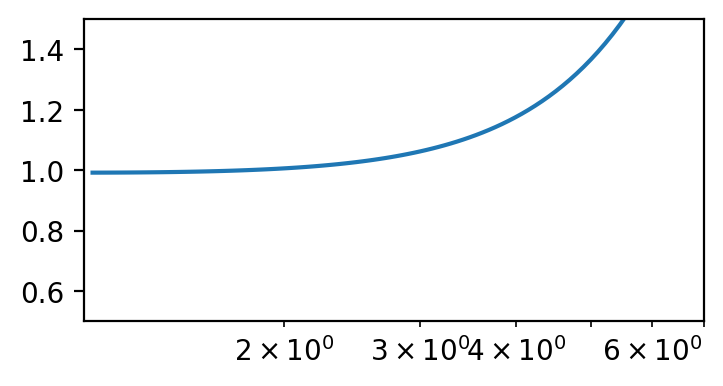

In [8]:
#导入函数库
import matplotlib.pylab as plt
import numpy as np

data=np.loadtxt('../output/Des/NGhmf_factor.dat')
nu=data[:,1]
f=data[:,2]
plt.figure(0,figsize=(4,2),dpi=200)
plt.semilogx(nu,f)
plt.ylim(0.5,1.5)
plt.xlim(1.1,7.)

(1e-09, 0.0001)

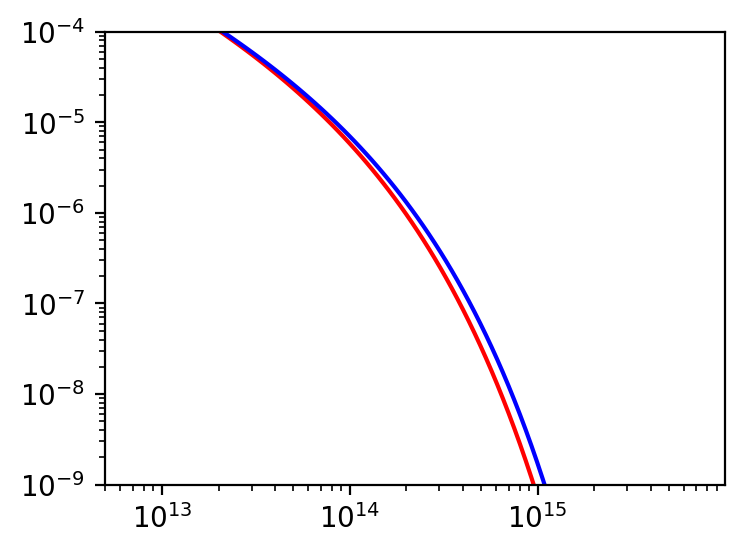

In [16]:
#导入函数库
import matplotlib.pylab as plt
import numpy as np

data=np.loadtxt('../output/Des/NGhmf_factor.dat')
m=data[:,0]
f=data[:,2]
dndlnm=data[:,3]
plt.figure(0,figsize=(4,3),dpi=200)
plt.loglog(m,dndlnm/f,'red')
plt.loglog(m,dndlnm,'blue')

plt.ylim(1.0e-9,1.0e-4)
#plt.xlim(5.e14,1.e15)

# Fisher Matrix

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from __future__ import print_function

#CMB先验
# ODE, w0, wa,   ln Omh2,  ln Obh2,  n_s,   alpha_s,  ln delta_zeta  , tau_reio
Np=9
data=np.loadtxt('../output/oguri_cmb/matrix.dat')
Fcmb=data[0:Np,0:Np]
print('{:e}'.format(np.linalg.cond(Fcmb)))
Ccmb=np.matrix(Fcmb).I
print("planck prior:")
for i in range(Np):
    print('{:.4f}'.format(np.sqrt(Ccmb[i,i])),end=' ')
print('\n')

dele=[0,1,2,8]
Ccmb=np.delete(Ccmb,dele,axis=0)
Ccmb=np.delete(Ccmb,dele,axis=1)
Fcmb=np.matrix(Ccmb).I
#     ，  ，  ，  ln Omh2,  ln Obh2,  n_s,   alpha_s,  ln delta_zeta  ,   ，


# ODE, w0, wa,   ln Omh2,  ln Obh2,  n_s,   alpha_s,  ln delta_zeta  , fnl (9个)
Np=23
Fprior=np.zeros((Np,Np))
for i in range(3,8):
    for j in range(3,8):
        Fprior[i,j]=Fcmb[i-3,j-3]


data=np.loadtxt('../output/oguri_cen/matrix.dat')
F=data[0:Np,0:Np]
Fhh=data[Np:2*Np,0:Np]
Fhk=data[2*Np:3*Np,0:Np]
print('{:e}'.format(np.linalg.cond(F)),'{:e}'.format(np.linalg.cond(Fhh)),'{:e}'.format(np.linalg.cond(Fhk)))

print("\n no prior, hh+hk:")
C=np.matrix(F).I
Chh=np.matrix(Fhh[:23,:23]).I
Chk=np.matrix(Fhk).I
for i in range(Np):
    print('{:1.4f}'.format(np.sqrt(C[i,i])),end=' ')
print('')
for i in range(23):
    print('{:1.4f}'.format(np.sqrt(Chh[i,i])),end=' ')
print('')
for i in range(Np):
    print('{:1.4f}'.format(np.sqrt(Chk[i,i])),end=' ')
print('')

F=Fprior+F
Fhh=Fprior+Fhh
Fhk=Fprior+Fhk
dele=[]
#dele=[8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]
#dele = [8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32]
F=np.delete(F,dele,axis=0)
F=np.delete(F,dele,axis=1)
Fhh=np.delete(Fhh,dele,axis=0)
Fhh=np.delete(Fhh,dele,axis=1)
Fhk=np.delete(Fhk,dele,axis=0)
Fhk=np.delete(Fhk,dele,axis=1)
#print(F,'\n')
C=np.matrix(F).I
Chh=np.matrix(Fhh[:23,:23]).I
Chk=np.matrix(Fhk).I

print("\n +prior:")
for i in range(Np-len(dele)):
    print('{:.4f}'.format(np.sqrt(C[i,i])),end=' ')
print('')
#for i in range(Np-len(dele)):
for i in range(23):
    print('{:.4f}'.format(np.sqrt(Chh[i,i])),end=' ')
print('')
for i in range(Np-len(dele)):
    print('{:.4f}'.format(np.sqrt(Chk[i,i])),end=' ')
print('')


# 参数       ODE,   w0,     wa,     ln Omh2,    ln Obh2,    n_s,        alpha_s,    ln delta_zeta,  fnl (9个)
# Planck                            0.0102,     0.0086,     0.0226,     0.0068,     0.0174
# +N        0.099,  0.62,   2.17,   0.0101,     0.0085,     0.0218,     0.0066,     0.0169,         /
# +N+hh     0.035,  0.37,   1.13,   0.0098,     0.0079,     0.0201,     0.0061,     0.0158,         15.6
# +hk       0.056,  0.44,   1.12,   0.0099,     0.0080,     0.0205,     0.0063,     0.0161,         86.9
# +N+hh+hk  0.023,  0.22,   0.60,   0.0059,     0.0068,     0.0189,     0.0058,     0.0143,         14.5



1.866325e+08
planck prior:
0.1783 0.9302 1.6599 0.0113 0.0101 0.0232 0.0070 0.0210 0.0122 



LinAlgError: cond is not defined on empty arrays

# 先比较N

In [42]:
import numpy as np 
import matplotlib.pyplot as plt
from __future__ import print_function

#CMB先验
# ODE, w0, wa,   ln Omh2,  ln Obh2,  n_s,   alpha_s,  ln delta_zeta  , tau_reio
Np=9
data=np.loadtxt('../output/oguri_cmb/matrix.dat')
Fcmb=data[0:Np,0:Np]
print('{:e}'.format(np.linalg.cond(Fcmb)))
Ccmb=np.matrix(Fcmb).I
print("planck prior:")
for i in range(Np):
    print('{:.4f}'.format(np.sqrt(Ccmb[i,i])),end=' ')
print('\n')

dele=[0,1,2,8]
Ccmb=np.delete(Ccmb,dele,axis=0)
Ccmb=np.delete(Ccmb,dele,axis=1)
Fcmb=np.matrix(Ccmb).I
#     ，  ，  ，  ln Omh2,  ln Obh2,  n_s,   alpha_s,  ln delta_zeta  ,   ，


# ODE, w0, wa,   ln Omh2,  ln Obh2,  n_s,   alpha_s,  ln delta_zeta  , fnl (9个)
Np=23
Fprior=np.zeros((Np,Np))
for i in range(3,8):
    for j in range(3,8):
        Fprior[i,j]=Fcmb[i-3,j-3]


data=np.loadtxt('../output/oguri_cen/matrix.dat')
FN=data[0:Np,0:Np]

# print("\n no prior, N:")
# CN=np.matrix(FN).I

# for i in range(Np):
#     print('{:1.4f}'.format(np.sqrt(CN[i,i])),end=' ')
# print('')


FN=Fprior+FN

dele=[8]
#dele=[8,9,16]
#17
#dele=[8,9,10,11,12,13,14,15]
#2.7
#dele=[8,9,12,13,14,15]
#dele=[8,16,17,18,19,20,21,22]
#9.7
#dele=[8, 10,11,12, 13,14,15,  17,18,19,  20,21,22]
#dele=[8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]
#dele = [8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32]
FN=np.delete(FN,dele,axis=0)
FN=np.delete(FN,dele,axis=1)

#print(F,'\n')
CN=np.matrix(FN).I


print("\n +prior:")

for i in range(Np-len(dele)):
    print('{:.4f}'.format(np.sqrt(CN[i,i])),end=' ')
print('')




# 参数       ODE,   w0,     wa,     ln Omh2,    ln Obh2,    n_s,        alpha_s,    ln delta_zeta,  fnl (9个)
# Planck                            0.0102,     0.0086,     0.0226,     0.0068,     0.0174
# +N        0.099,  0.62,   2.17,   0.0101,     0.0085,     0.0218,     0.0066,     0.0169,         /
# +N+hh     0.035,  0.37,   1.13,   0.0098,     0.0079,     0.0201,     0.0061,     0.0158,         15.6
# +hk       0.056,  0.44,   1.12,   0.0099,     0.0080,     0.0205,     0.0063,     0.0161,         86.9
# +N+hh+hk  0.023,  0.22,   0.60,   0.0059,     0.0068,     0.0189,     0.0058,     0.0143,         14.5



1.866325e+08
planck prior:
0.1783 0.9302 1.6599 0.0113 0.0101 0.0232 0.0070 0.0210 0.0122 


 +prior:
7.2458 5.2649 15.4630 0.0113 0.0101 0.0232 0.0070 0.0210 34.4679 9.1788 2.3640 0.1705 38.0747 22.1683 3.6019 36.4530 18.6108 5.2158 0.8171 10.4798 8.3777 1.8428 


6.3265 4.4506 12.9533 0.0113 0.0101 0.0232 0.0070 0.0210 26.9453 7.1375 1.4966 0.1279 32.9182 18.6450 2.9596 23.2381 12.0110 3.4358 0.5198 7.5443 5.6543 1.0765 

0.0113 0.0101 0.0232 0.0070 0.0210 18.6461  4.4251 1.9381 0.1358 5.3053 6.5535 0.3360 28.7684 13.6878 3.8654 0.6508 7.6438 5.1177 0.8437 
0.0113 0.0101 0.0232 0.0070 0.0210 18.3179  4.3942 1.8916 0.1323 5.2846 6.4220 0.3327 28.2213 13.5152 3.8110 0.6310 7.3534 4.9216 0.8117 

7.2216 5.2919 15.4194 0.0113 0.0101 0.0232 0.0070 0.0210 35.0258 9.2865 2.5060 0.1750 38.1979 22.3386 3.6592 38.3979 19.4280 5.4511 0.8579 11.2192 9.0902 2.0577 
7.4949 5.5675 16.0217 0.0113 0.0101 0.0232 0.0070 0.0210 37.1346 9.8381 2.6388 0.1846 39.4827 23.6613 3.8366 40.3823 20.4662 5.7507 0.9154 11.8461 9.5829 2.1415 



# 单独比较 hk

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from __future__ import print_function

#CMB先验
# ODE, w0, wa,   ln Omh2,  ln Obh2,  n_s,   alpha_s,  ln delta_zeta  , tau_reio
Np=9
data=np.loadtxt('../output/oguri_cmb/matrix.dat')
Fcmb=data[0:Np,0:Np]
print('{:e}'.format(np.linalg.cond(Fcmb)))
Ccmb=np.matrix(Fcmb).I
print("planck prior:")
for i in range(Np):
    print('{:.4f}'.format(np.sqrt(Ccmb[i,i])),end=' ')
print('\n')

dele=[0,1,2,8]
Ccmb=np.delete(Ccmb,dele,axis=0)
Ccmb=np.delete(Ccmb,dele,axis=1)
Fcmb=np.matrix(Ccmb).I
#     ，  ，  ，  ln Omh2,  ln Obh2,  n_s,   alpha_s,  ln delta_zeta  ,   ，


# ODE, w0, wa,   ln Omh2,  ln Obh2,  n_s,   alpha_s,  ln delta_zeta  , fnl (9个)
Np=23
Fprior=np.zeros((Np,Np))
for i in range(3,8):
    for j in range(3,8):
        Fprior[i,j]=Fcmb[i-3,j-3]


data=np.loadtxt('../output/oguri_cen/matrix.dat')
FN=data[0:Np,0:Np]

# print("\n no prior, N:")
# CN=np.matrix(FN).I

# for i in range(Np):
#     print('{:1.4f}'.format(np.sqrt(CN[i,i])),end=' ')
# print('')


FN=Fprior+FN

dele=[8]
#dele=[8,9,16]
#17
#dele=[8,9,10,11,12,13,14,15]
#2.7
#dele=[8,9,12,13,14,15]
#dele=[8,16,17,18,19,20,21,22]
#9.7
#dele=[8, 10,11,12, 13,14,15,  17,18,19,  20,21,22]
#dele=[8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]
#dele = [8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32]
FN=np.delete(FN,dele,axis=0)
FN=np.delete(FN,dele,axis=1)

#print(F,'\n')
CN=np.matrix(FN).I


print("\n +prior:")

for i in range(Np-len(dele)):
    print('{:.4f}'.format(np.sqrt(CN[i,i])),end=' ')
print('')




# 参数       ODE,   w0,     wa,     ln Omh2,    ln Obh2,    n_s,        alpha_s,    ln delta_zeta,  fnl (9个)
# Planck                            0.0102,     0.0086,     0.0226,     0.0068,     0.0174
# +N        0.099,  0.62,   2.17,   0.0101,     0.0085,     0.0218,     0.0066,     0.0169,         /
# +N+hh     0.035,  0.37,   1.13,   0.0098,     0.0079,     0.0201,     0.0061,     0.0158,         15.6
# +hk       0.056,  0.44,   1.12,   0.0099,     0.0080,     0.0205,     0.0063,     0.0161,         86.9
# +N+hh+hk  0.023,  0.22,   0.60,   0.0059,     0.0068,     0.0189,     0.0058,     0.0143,         14.5



NameError: name 'np' is not defined

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
from __future__ import print_function

#CMB先验
# ODE, w0, wa,   ln Omh2,  ln Obh2,  n_s,   alpha_s,  ln delta_zeta  , tau_reio
Np=9
data=np.loadtxt('../output/oguri_cmb/matrix.dat')
Fcmb=data[0:Np,0:Np]
print('{:e}'.format(np.linalg.cond(Fcmb)))
Ccmb=np.matrix(Fcmb).I
print("planck prior:")
for i in range(Np):
    print('{:.4f}'.format(np.sqrt(Ccmb[i,i])),end=' ')
print('\n')

dele=[0,1,2,8]
Ccmb=np.delete(Ccmb,dele,axis=0)
Ccmb=np.delete(Ccmb,dele,axis=1)
Fcmb=np.matrix(Ccmb).I
#     ，  ，  ，  ln Omh2,  ln Obh2,  n_s,   alpha_s,  ln delta_zeta  ,   ，


# ODE, w0, wa,   ln Omh2,  ln Obh2,  n_s,   alpha_s,  ln delta_zeta  , fnl (9个)
Np=33
Fprior=np.zeros((Np,Np))
for i in range(3,8):
    for j in range(3,8):
        Fprior[i,j]=Fcmb[i-3,j-3]


data=np.loadtxt('../output/oguri_cen/matrix.dat')
Fhk=data[2*Np:3*Np,0:Np]

# print("\n no prior, N:")
# CN=np.matrix(FN).I

# for i in range(Np):
#     print('{:1.4f}'.format(np.sqrt(CN[i,i])),end=' ')
# print('')


Fhk=Fprior+Fhk

dele=[8]
#dele=[8,9,16]
#17
#dele=[8,9,10,11,12,13,14,15]
#2.7
#dele=[8,9,12,13,14,15]
#dele=[8,16,17,18,19,20,21,22]
#9.7
#dele=[8, 10,11,12, 13,14,15,  17,18,19,  20,21,22]
#dele=[8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]
#dele = [8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32]
Fhk=np.delete(Fhk,dele,axis=0)
Fhk=np.delete(Fhk,dele,axis=1)

#print(F,'\n')
Chk=np.matrix(Fhk).I


print("\n +prior:")

for i in range(Np-len(dele)):
    print('{:.4f}'.format(np.sqrt(Chk[i,i])),end=' ')
print('')




# 参数       ODE,   w0,     wa,     ln Omh2,    ln Obh2,    n_s,        alpha_s,    ln delta_zeta,  fnl (9个)
# Planck                            0.0102,     0.0086,     0.0226,     0.0068,     0.0174
# +N        0.099,  0.62,   2.17,   0.0101,     0.0085,     0.0218,     0.0066,     0.0169,         /
# +N+hh     0.035,  0.37,   1.13,   0.0098,     0.0079,     0.0201,     0.0061,     0.0158,         15.6
# +hk       0.056,  0.44,   1.12,   0.0099,     0.0080,     0.0205,     0.0063,     0.0161,         86.9
# +N+hh+hk  0.023,  0.22,   0.60,   0.0059,     0.0068,     0.0189,     0.0058,     0.0143,         14.5

